In [160]:
# Importing required libraries

import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder,StandardScaler
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from scipy.stats import zscore
from sklearn import preprocessing

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

In [161]:
data=pd.read_csv(r"C:\Users\OM RAJ PANDEY\Desktop\jupyter\Data-Science-ML-Capstone-Projects-master\Data-Science-ML-Capstone-Projects-master\Automobile_insurance_fraud.csv")

In [162]:
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [163]:
data.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


There is some outliers and one column _c39 is filled with null values

In [164]:
#Dropping columns
data.drop('_c39', axis=1, inplace=True)

In [165]:
data.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

There is no null values in the dataset

In [166]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

# Exploratory data analysis

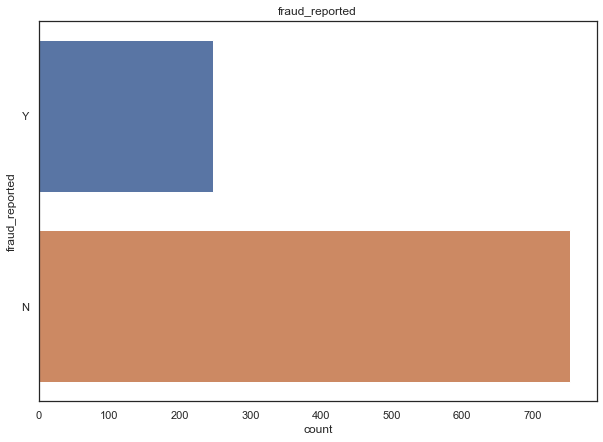

In [167]:
plt.figure(figsize=(10,7))
sns.countplot(y='fraud_reported',data=data)
plt.title('fraud_reported')
plt.show()

The value of no is more than value of yes

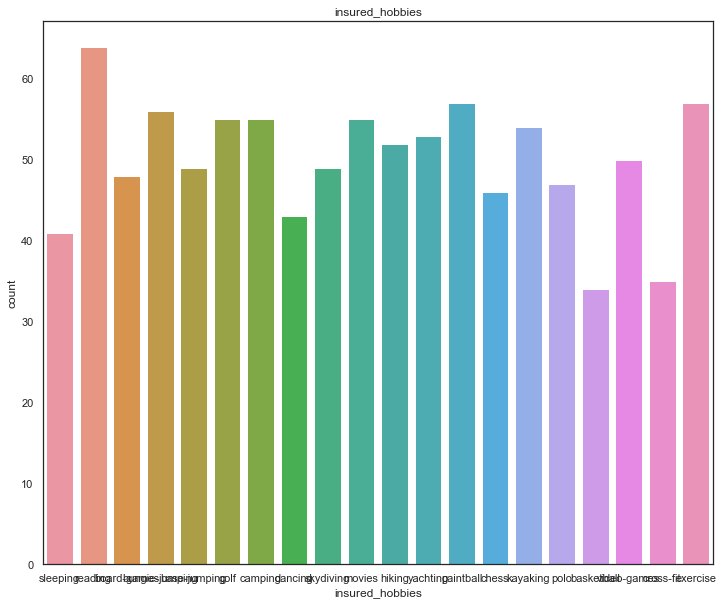

In [168]:
plt.figure(figsize=(12,10))
sns.countplot(x='insured_hobbies',data=data)
plt.title('insured_hobbies')
plt.show()

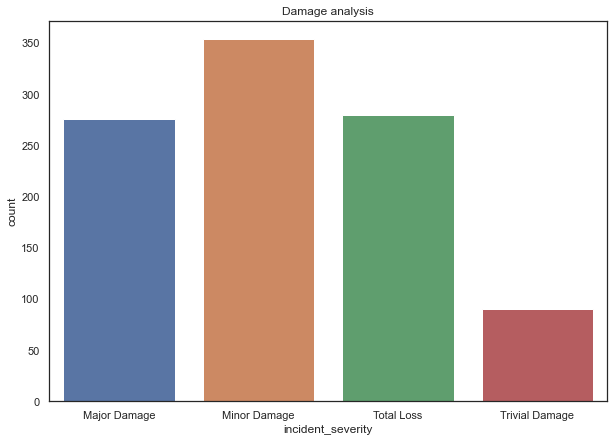

In [169]:
plt.figure(figsize=(10,7))
sns.countplot(x='incident_severity',data=data)
plt.title('Damage analysis')
plt.show()

Minor damage is highest

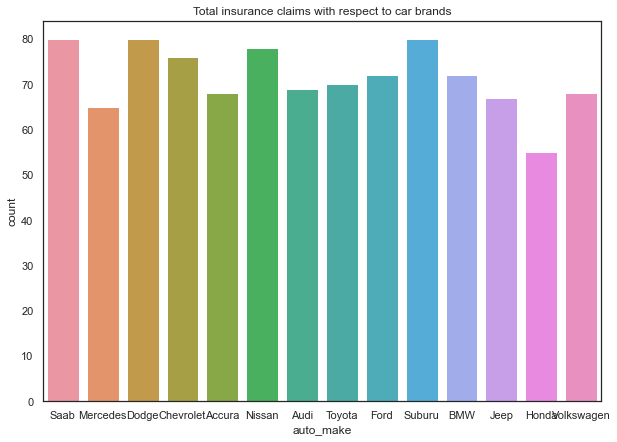

In [170]:
plt.figure(figsize=(10,7))
sns.countplot(x='auto_make',data=data)
plt.title('Total insurance claims with respect to car brands')
plt.show()

The injury_claim found highest in the Saab,Dodge and Suburu

Checking correlation between dependent and independent variables

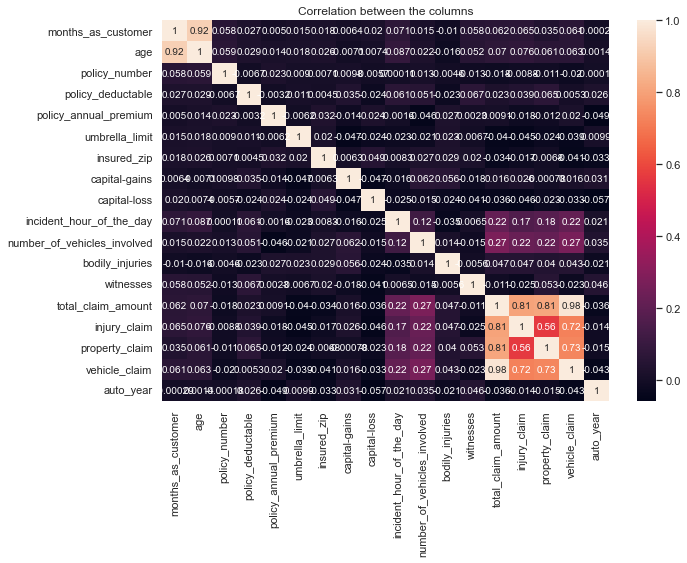

In [171]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(), annot=True)
plt.title('Correlation between the columns')
plt.show()

# Plotting Histogram

array([[<AxesSubplot:title={'center':'months_as_customer'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'policy_number'}>],
       [<AxesSubplot:title={'center':'policy_deductable'}>,
        <AxesSubplot:title={'center':'policy_annual_premium'}>,
        <AxesSubplot:title={'center':'umbrella_limit'}>],
       [<AxesSubplot:title={'center':'insured_zip'}>,
        <AxesSubplot:title={'center':'capital-gains'}>,
        <AxesSubplot:title={'center':'capital-loss'}>],
       [<AxesSubplot:title={'center':'incident_hour_of_the_day'}>,
        <AxesSubplot:title={'center':'number_of_vehicles_involved'}>,
        <AxesSubplot:title={'center':'bodily_injuries'}>],
       [<AxesSubplot:title={'center':'witnesses'}>,
        <AxesSubplot:title={'center':'total_claim_amount'}>,
        <AxesSubplot:title={'center':'injury_claim'}>],
       [<AxesSubplot:title={'center':'property_claim'}>,
        <AxesSubplot:title={'center':'vehicle_claim'}>,
        <A

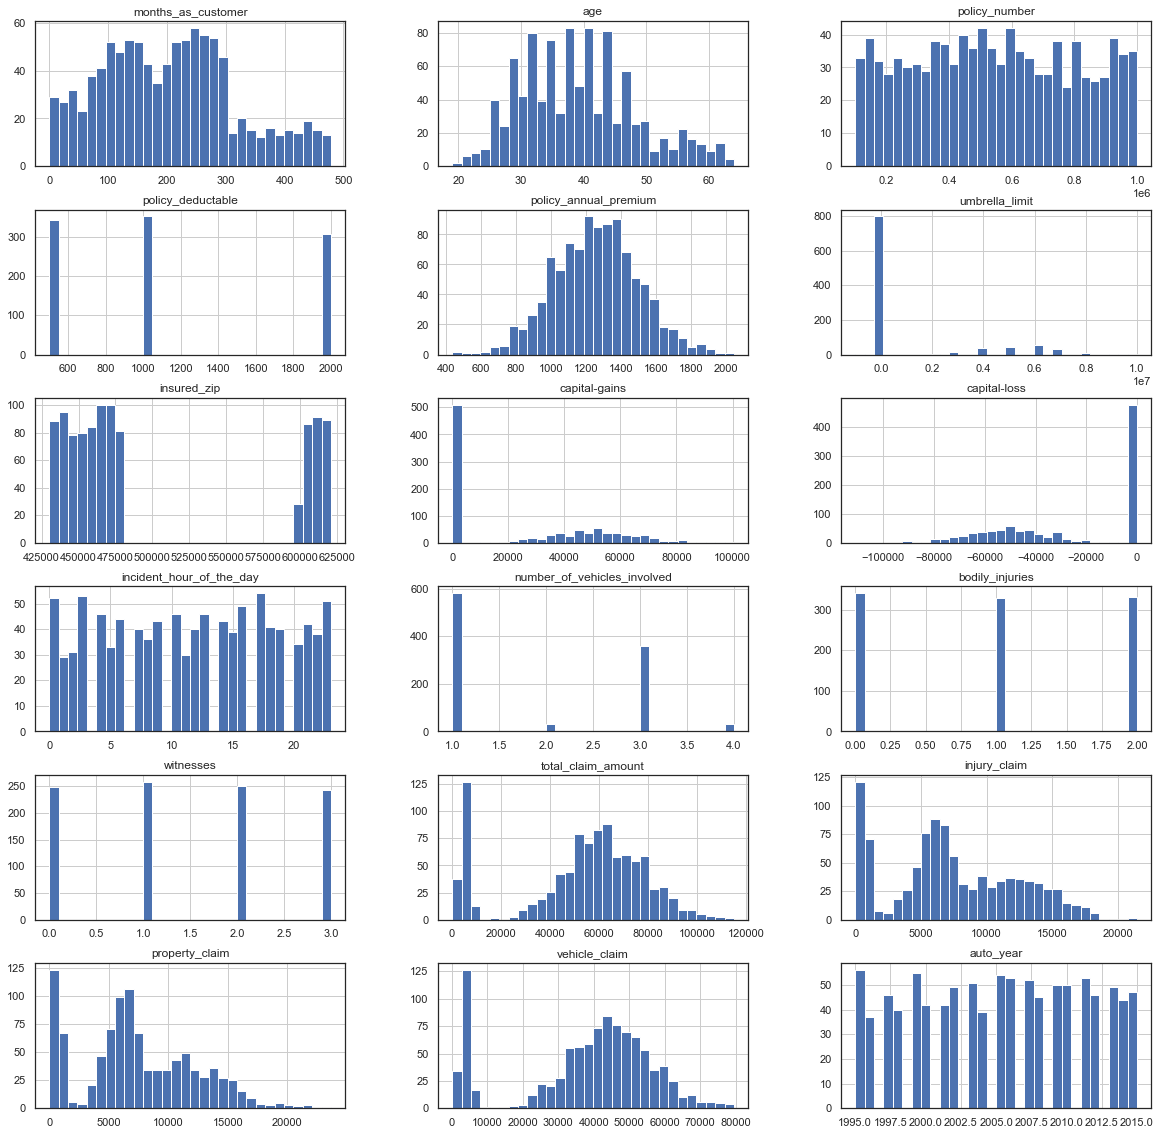

In [172]:
#Plotting histogram for univariate analysis and checking the normal distribution
data.hist(figsize=(20,20),grid=True,layout=(6,3),bins=30)

In [173]:
data.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
auto_year                     -0.048289
dtype: float64

In [174]:
# making the skew less than or equal to 0.55 for better prediction and plotting Normal distribution
skew=('umbrella_limit','insured_zip')
for col in skew:
    if data.skew().loc[col]>0.55:
        data[col]=np.log(data[col])

months_as_customer                AxesSubplot(0.125,0.772143;0.227941x0.107857)
age                            AxesSubplot(0.398529,0.772143;0.227941x0.107857)
policy_number                  AxesSubplot(0.672059,0.772143;0.227941x0.107857)
policy_deductable                 AxesSubplot(0.125,0.642714;0.227941x0.107857)
policy_annual_premium          AxesSubplot(0.398529,0.642714;0.227941x0.107857)
umbrella_limit                 AxesSubplot(0.672059,0.642714;0.227941x0.107857)
insured_zip                       AxesSubplot(0.125,0.513286;0.227941x0.107857)
capital-gains                  AxesSubplot(0.398529,0.513286;0.227941x0.107857)
capital-loss                   AxesSubplot(0.672059,0.513286;0.227941x0.107857)
incident_hour_of_the_day          AxesSubplot(0.125,0.383857;0.227941x0.107857)
number_of_vehicles_involved    AxesSubplot(0.398529,0.383857;0.227941x0.107857)
bodily_injuries                AxesSubplot(0.672059,0.383857;0.227941x0.107857)
witnesses                         AxesSu

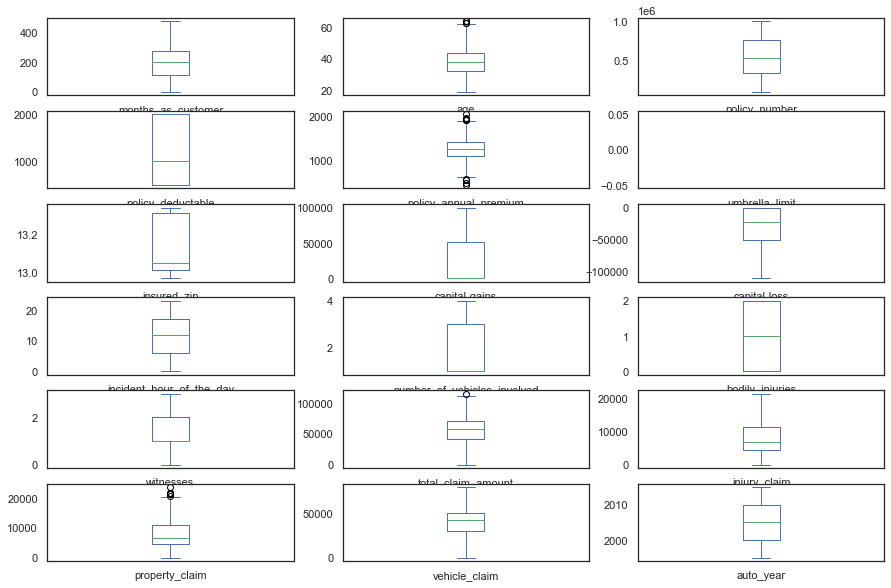

In [175]:
#Plotting the box plot of each column to check the outlier
data.plot(kind='box',subplots=True,layout=(6,3),figsize=(15,10))

In [176]:
scaler=preprocessing.StandardScaler()
data['age']=scaler.fit_transform(data['age'].values.reshape(-1,1))
data['property_claim']=scaler.fit_transform(data['property_claim'].values.reshape(-1,1))
data['policy_annual_premium']=scaler.fit_transform(data['policy_annual_premium'].values.reshape(-1,1))
data['age']=scaler.fit_transform(data['age'].values.reshape(-1,1))

data['insured_zip']=scaler.fit_transform(data['insured_zip'].values.reshape(-1,1))

# Label Encoding

In [177]:
# Converting object column into numeric using encoder
le1=LabelEncoder()
data['policy_state']=le1.fit_transform(data['policy_state'])
le2=LabelEncoder()
data['policy_bind_date']=le2.fit_transform(data['policy_bind_date'])
le3=LabelEncoder()
data['policy_csl']=le3.fit_transform(data['policy_csl'])
le4=LabelEncoder()
data['insured_sex']=le4.fit_transform(data['insured_sex'])
le5=LabelEncoder()
data['insured_education_level']=le5.fit_transform(data['insured_education_level'])
le6=LabelEncoder()
data['insured_occupation']=le6.fit_transform(data['insured_occupation'])
le7=LabelEncoder()
data['insured_hobbies']=le7.fit_transform(data['insured_hobbies'])
le8=LabelEncoder()
data['insured_relationship']=le8.fit_transform(data['insured_relationship'])
le9=LabelEncoder()
data['incident_date']=le9.fit_transform(data['incident_date'])
le10=LabelEncoder()
data['incident_type']=le10.fit_transform(data['incident_type'])
le11=LabelEncoder()
data['collision_type']=le11.fit_transform(data['collision_type'])
le12=LabelEncoder()
data['incident_severity']=le12.fit_transform(data['incident_severity'])
le13=LabelEncoder()
data['authorities_contacted']=le13.fit_transform(data['authorities_contacted'])
le14=LabelEncoder()
data['incident_state']=le14.fit_transform(data['incident_state'])
le15=LabelEncoder()
data['incident_city']=le15.fit_transform(data['incident_city'])
le16=LabelEncoder()
data['incident_location']=le16.fit_transform(data['incident_location'])
le17=LabelEncoder()
data['property_damage']=le17.fit_transform(data['property_damage'])
le18=LabelEncoder()
data['police_report_available']=le18.fit_transform(data['police_report_available'])
le19=LabelEncoder()
data['auto_make']=le19.fit_transform(data['auto_make'])
le20=LabelEncoder()
data['auto_model']=le20.fit_transform(data['auto_model'])
le21=LabelEncoder()
data['fraud_reported']=le21.fit_transform(data['fraud_reported'])

In [178]:
data.head(10)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,0.990836,521585,532,2,1,1000,0.616705,-inf,-0.462135,...,2,2,71610,6510,1.165505,52080,10,1,2004,1
1,228,0.334073,342868,821,1,1,2000,-0.242521,15.424948,-0.430025,...,0,0,5070,780,-1.372696,3510,8,12,2007,1
2,134,-1.088913,687698,186,2,0,2000,0.642233,15.424948,-1.043477,...,3,1,34650,7700,-0.736072,23100,4,30,2007,0
3,256,0.224613,227811,766,0,1,2000,0.652886,15.607270,1.489236,...,2,1,63400,6340,-0.219722,50720,3,34,2014,1
4,228,0.552994,367455,181,0,2,1000,1.341980,15.607270,1.520414,...,1,1,6500,1300,-1.399654,4550,0,31,2009,0
5,256,0.005692,104594,385,2,1,1000,0.388018,-inf,-0.270627,...,2,1,64100,6410,-0.205206,51280,10,3,2003,1
6,137,-0.541611,413978,112,1,1,1000,0.315285,-inf,-0.856974,...,0,0,78650,21450,-0.051753,50050,9,29,2012,0
7,165,-0.213229,429027,60,0,0,1000,-0.489156,-inf,1.429596,...,2,2,51590,9380,0.410680,32830,1,5,2015,0
8,27,-0.651071,485665,132,0,0,500,0.764546,-inf,1.411799,...,1,2,27700,2770,-0.960031,22160,12,9,2012,0
9,212,0.334073,636550,772,0,0,500,0.242881,-inf,1.402634,...,1,0,42300,4700,-0.559808,32900,10,1,1996,0


In [179]:
data.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 1
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [180]:
data['umbrella_limit'].value_counts()

-inf          798
 15.607270     57
 15.424948     46
 15.201805     39
 15.761421     29
 14.914123     12
 15.894952      8
 16.012735      5
 14.508658      3
 16.118096      2
Name: umbrella_limit, dtype: int64

In [181]:
data.drop('umbrella_limit', axis=1, inplace=True)

In [182]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   float64
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   int32  
 4   policy_state                 1000 non-null   int32  
 5   policy_csl                   1000 non-null   int32  
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   insured_zip                  1000 non-null   float64
 9   insured_sex                  1000 non-null   int32  
 10  insured_education_level      1000 non-null   int32  
 11  insured_occupation           1000 non-null   int32  
 12  insured_hobbies              1000 non-null   int32  
 13  insured_relationshi

In [183]:
#divide the dataset into x and y
x=data.drop(['fraud_reported'], axis=1)
y=data['fraud_reported']

In [184]:
from imblearn.over_sampling import SMOTE
from collections import Counter
smote=SMOTE()
x_smote, y_smote=smote.fit_resample(x,y)
print(Counter(y))
print(Counter(y_smote))

Counter({0: 753, 1: 247})
Counter({1: 753, 0: 753})


In [185]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.3, random_state=40)

In [186]:
lr=LogisticRegression()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
adb=AdaBoostClassifier()

lr.fit(x_train, y_train)
dt.fit(x_train, y_train)
rf.fit(x_train, y_train)
adb.fit(x_train, y_train)

AdaBoostClassifier()

In [187]:
print("lr classification score",lr.score(x_train, y_train))
print("dt classification score",dt.score(x_train, y_train))
print("rf classification score",rf.score(x_train, y_train))
print("adb classification score",adb.score(x_train, y_train))

lr classification score 0.7685714285714286
dt classification score 1.0
rf classification score 1.0
adb classification score 0.8842857142857142


# Model Evaluation:

In [188]:
lr_ypred=lr.predict(x_test)
dt_ypred=dt.predict(x_test)
rf_ypred=rf.predict(x_test)
adb_ypred=adb.predict(x_test)

In [189]:
# Using confusion matrix in order to evaluate the model accuracy
lr_conf_mat=confusion_matrix(y_test, lr_ypred)
print(lr_conf_mat)

[[216   0]
 [ 84   0]]


In [190]:
dt_conf_mat=confusion_matrix(y_test, dt_ypred)
print(dt_conf_mat)

[[184  32]
 [ 40  44]]


In [191]:
rf_conf_mat=confusion_matrix(y_test, rf_ypred)
print(rf_conf_mat)

[[204  12]
 [ 65  19]]


In [192]:
adb_conf_mat=confusion_matrix(y_test, adb_ypred)
print(adb_conf_mat)

[[199  17]
 [ 53  31]]


# Checking Classification report for each model

In [193]:
lr_report=classification_report(y_test, lr_ypred)
print(lr_report)

              precision    recall  f1-score   support

           0       0.72      1.00      0.84       216
           1       0.00      0.00      0.00        84

    accuracy                           0.72       300
   macro avg       0.36      0.50      0.42       300
weighted avg       0.52      0.72      0.60       300



In [194]:
dt_report=classification_report(y_test, dt_ypred)
print(dt_report)

              precision    recall  f1-score   support

           0       0.82      0.85      0.84       216
           1       0.58      0.52      0.55        84

    accuracy                           0.76       300
   macro avg       0.70      0.69      0.69       300
weighted avg       0.75      0.76      0.76       300



In [195]:
rf_report=classification_report(y_test, rf_ypred)
print(rf_report)

              precision    recall  f1-score   support

           0       0.76      0.94      0.84       216
           1       0.61      0.23      0.33        84

    accuracy                           0.74       300
   macro avg       0.69      0.59      0.59       300
weighted avg       0.72      0.74      0.70       300



In [196]:
adb_report=classification_report(y_test, adb_ypred)
print(adb_report)

              precision    recall  f1-score   support

           0       0.79      0.92      0.85       216
           1       0.65      0.37      0.47        84

    accuracy                           0.77       300
   macro avg       0.72      0.65      0.66       300
weighted avg       0.75      0.77      0.74       300



# ROC AUC Curve:

In [197]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import plot_roc_curve

#importing the roc and auc from sklearn and predict the x_test and checking the roc_auc_score
print(roc_auc_score(y_test, lr.predict(x_test)))
print(roc_auc_score(y_test, dt.predict(x_test)))
print(roc_auc_score(y_test, rf.predict(x_test)))
print(roc_auc_score(y_test, adb.predict(x_test)))

0.5
0.6878306878306878
0.5853174603174603
0.6451719576719577


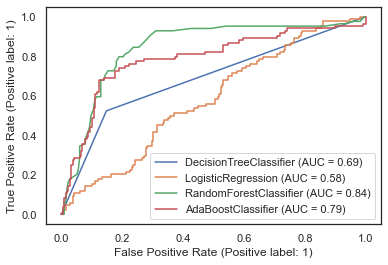

In [198]:
# lets find the roc curve to check the best fitted model
disp=plot_roc_curve(dt, x_test, y_test)
plot_roc_curve(lr, x_test, y_test, ax=disp.ax_)
plot_roc_curve(rf, x_test, y_test, ax=disp.ax_)
plot_roc_curve(adb, x_test, y_test, ax=disp.ax_)
plt.legend(prop={"size":11}, loc='lower right')

As per above observation we can see Random Forest Classifier give the best score

# K-Fold Cross Validation:

In [199]:
from sklearn.model_selection import KFold, cross_val_score

k_f=KFold(n_splits=4, shuffle=True)
k_f

KFold(n_splits=4, random_state=None, shuffle=True)

In [200]:
print("Mean of Cross validation score for Random Forest model","=>", cross_val_score(rf, x, y, cv=5).mean())

Mean of Cross validation score for Random Forest model => 0.7710000000000001


# Hyperparameter Tuning:

In [201]:
# Number of trees in Random Forest
n_estimators=[int(x) for x in np.linspace(start=10, stop=80, num=10)]
#Number of features to consider at every split
max_features=['auto', 'sqrt']
#Maximum number of levels in tree
max_depth=[2, 4]
#Minimum number of samples required to split a node
min_samples_split=[2, 5]
#Minimum number of samples required at each leaf node
min_samples_leaf=[1, 2]
#Method of selecting samples for training each tree
bootstrap=[True, False]

In [202]:
# Create the param grid
param_grid={'n_estimators':n_estimators,
           'max_features':max_features,
           'max_depth':max_depth,
           'min_samples_split':min_samples_split,
           'min_samples_leaf':min_samples_leaf,
           'bootstrap':bootstrap}
print(param_grid)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [203]:
rf_model=RandomForestClassifier()

In [204]:
from sklearn.model_selection import GridSearchCV
rf_grid=GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, verbose=2, n_jobs=4)


In [205]:
rf_grid.fit(x_train, y_train)

Fitting 3 folds for each of 320 candidates, totalling 960 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=2)

In [206]:
rf_grid.best_params_

{'bootstrap': False,
 'max_depth': 4,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 17}

# Check Accuracy

In [207]:
print(f'Train Accuracy-:{rf_grid.score(x_train, y_train):.3f}')
print(f'Test Accuracy-:{rf_grid.score(x_test, y_test):.3f}')

Train Accuracy-:0.811
Test Accuracy-:0.717


# Saving Model

In [208]:
rf=RandomForestClassifier()
rf.fit(x, y)

RandomForestClassifier()

In [209]:
import joblib

In [210]:
joblib.dump(rf, 'model_joblib_rf')

['model_joblib_rf']

In [211]:
model=joblib.load('model_joblib_rf')